Available categorical columns for encoding: ['Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainToday']
Accuracy: 0.8474838443558367
Confusion Matrix:
[[21490  1182]
 [ 3255  3165]]
Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.95      0.91     22672
           1       0.73      0.49      0.59      6420

    accuracy                           0.85     29092
   macro avg       0.80      0.72      0.75     29092
weighted avg       0.84      0.85      0.84     29092

ROC AUC Score: 0.8680129414299439


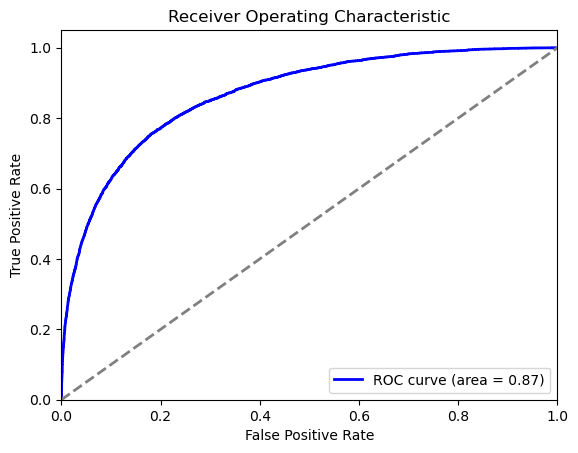

Cross-validation scores: [0.85614849 0.84875827 0.84523503 0.84824267 0.84626622 0.84867234
 0.84918794 0.84824267 0.84393262 0.84831557]
Mean CV score: 0.8483001825916926
Best parameters: {'C': 100}
Best cross-validation score: 0.8483431512074919
Best Model Accuracy: 0.847415096933865


In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score, roc_curve

# Load the dataset
data = pd.read_csv(r"C:\Users\deepa\Downloads\csv files\weatherAUS.csv")

# Handle missing values
numerical_cols = data.select_dtypes(include=['float64', 'int64']).columns
data[numerical_cols] = data[numerical_cols].apply(lambda x: x.fillna(x.median()), axis=0)

categorical_cols = data.select_dtypes(include=['object']).columns
data[categorical_cols] = data[categorical_cols].apply(lambda x: x.fillna(x.mode()[0]), axis=0)

# Check and encode categorical features
categorical_columns = ['Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainToday']
available_categorical_columns = [col for col in categorical_columns if col in data.columns]
print(f"Available categorical columns for encoding: {available_categorical_columns}")

if available_categorical_columns:
    data = pd.get_dummies(data, columns=available_categorical_columns, drop_first=True)
else:
    print("No categorical columns available for encoding.")

# Convert target variable 'RainTomorrow' to binary (0 for 'No', 1 for 'Yes')
data['RainTomorrow'] = data['RainTomorrow'].apply(lambda x: 1 if x == 'Yes' else 0)

# Drop the 'Date' column as it is not needed for the prediction
data = data.drop(columns=['Date'])

# Declare feature vector and target variable
X = data.drop(columns=['RainTomorrow'])
y = data['RainTomorrow']

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize the Logistic Regression model
logreg = LogisticRegression()

# Train the model
logreg.fit(X_train_scaled, y_train)

# Predict results
y_pred = logreg.predict(X_test_scaled)

# Check accuracy score
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')

# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print('Confusion Matrix:')
print(conf_matrix)

# Classification report
class_report = classification_report(y_test, y_pred)
print('Classification Report:')
print(class_report)

# ROC - AUC
y_pred_prob = logreg.predict_proba(X_test_scaled)[:, 1]
roc_auc = roc_auc_score(y_test, y_pred_prob)
print(f'ROC AUC Score: {roc_auc}')

fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
plt.figure()
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc='lower right')
plt.show()

# k-Fold Cross Validation
cv_scores = cross_val_score(logreg, X_train_scaled, y_train, cv=10)
print(f'Cross-validation scores: {cv_scores}')
print(f'Mean CV score: {cv_scores.mean()}')

# Hyperparameter optimization using GridSearchCV
param_grid = {'C': [0.1, 1, 10, 100, 1000]}
grid_search = GridSearchCV(estimator=logreg, param_grid=param_grid, cv=10)
grid_search.fit(X_train_scaled, y_train)
print(f'Best parameters: {grid_search.best_params_}')
print(f'Best cross-validation score: {grid_search.best_score_}')

# Train the model with best parameters
best_logreg = grid_search.best_estimator_
best_logreg.fit(X_train_scaled, y_train)

# Predict and evaluate the model
y_pred_best = best_logreg.predict(X_test_scaled)
best_accuracy = accuracy_score(y_test, y_pred_best)
print(f'Best Model Accuracy: {best_accuracy}')